In [7]:
# Vérifier inf dans dataframe
def check_inf_values(df):

  """
  Afficher les informations concernant si le dafaframe contient des valeurs infinites
  Parameters:
    -----------------
  df (DataFrame) : Dataframe analysis
        
  Returns:
  -----------------
  Le nombre de valeurs infinites dans le dataframe
  """
  
  count = np.isinf(df).values.sum()
  print("Le dataframe contient " + str(count) + " infinite values")

    
# Plot NaN pourcentage
def plot_pourcentage_NaN_features(df):

     """
    Afficher les informations concernant les valeurs manquantes des features
    Parameters:
    -----------------
    df (DataFrame) : Dataframe analysis
        
    Returns:
    -----------------
    tabulates les valeurs manquantes des features
    """
    
     plt.figure(figsize=(20,18))
     plt.title('Le pourcentage de valeurs manquantes pour les features', size=20)
     plt.plot((df.isna().sum()/df.shape[0]*100).sort_values(ascending=True))
     plt.xlabel('Features dataset', fontsize=18)
     plt.ylabel('Pourcentage NaN dans features', fontsize=18)
     plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
     plt.show()

     pct_dataset = pd.DataFrame((df.isna().sum()/df.shape[0]*100).sort_values(ascending=False))
     pct_dataset = pct_dataset.rename(columns={0:'Pct_NaN_colonne'})
     pct_dataset =pct_dataset.style.background_gradient(cmap='YlOrRd')
     return 

    
# fonction afficher les valeurs uniques pour chaque colonne 

from termcolor import colored
def unique_multi_cols(df):
  
  for col in list(df.columns):
    pct_nan = (df[col].isna().sum()/df[col].shape[0])
    unique = df[col].unique()
    nunique = df[col].nunique()
  
    print('')
    print(colored(col, 'red'))
    print('') 
    print((f'Le pourcentage NaN : {pct_nan*100}%'))
    print(f'Nombre de valeurs unique : {nunique}')
    print('')
    print(unique)
    print('')
    print('---------------------------------------------------------------------------------------')



In [3]:
# installer colored
pip install colored

Note: you may need to restart the kernel to use updated packages.


In [4]:
# installer termcolor
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [8]:
from pymongo import MongoClient
from datetime import datetime
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import json
plt.style.use('ggplot')

# Connect
client = MongoClient("mongodb://mongo:27017")

# Connect to database
db = client['DB_TEST']

coll = db['Churn_collection']


# read et loads chaques lignes pour inserer dans database (DB_TEST) et collection (col_restaurants)

json_file_path = "Bank Customer Churn Prediction2.json"

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

# insérer les données 
coll.insert_many(contents)

In [9]:
import pymongo
import json
client = MongoClient("mongodb://mongo:27017")
# Connect to database DB_TEST
db = client['DB_TEST']
# la Churn_collection
coll = db['Churn_collection']
# utiliser methode find pour récupérer les données churn
cursor = coll.find()
cursor

In [10]:
import pandas as pd
import numpy as np

#Création d'un dataframe
df_churn = pd.DataFrame(list(cursor))

In [11]:
# voir df
df_churn

,_id,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,640894efdb2eeb47f5c3e306,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,640894efdb2eeb47f5c3e307,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,640894efdb2eeb47f5c3e308,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,640894efdb2eeb47f5c3e309,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,640894efdb2eeb47f5c3e30a,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640894efdb2eeb47f5c40a11,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,640894efdb2eeb47f5c40a12,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,640894efdb2eeb47f5c40a13,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,640894efdb2eeb47f5c40a14,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
pipeline = [
  #Stage 1: Trouver les documents contenant les clients en France 
  {
    "$match": { "country": "France"}
  },
  # Stage 2: Trier les  credit_score (ASCENDING)
  {
    "$sort": {"credit_score": pymongo.ASCENDING }
  }
]

#Transformer pipeline en dataframe pandas 
results = coll.aggregate(pipeline)
results_pipe = pd.DataFrame(list(results))
results_pipe.tail()

,_id,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5009,640894efdb2eeb47f5c4083d,15682868,850,France,Female,40,9,99816.46,1,1,1,163989.66,1
5010,640894efdb2eeb47f5c40873,15709256,850,France,Female,28,9,0.00,2,1,1,164864.67,0
5011,640894efdb2eeb47f5c408de,15730579,850,France,Male,68,5,169445.40,1,1,1,186335.07,0
5012,640894efdb2eeb47f5c409d1,15647800,850,France,Female,34,6,101266.51,1,1,0,33501.98,0
5013,640894efdb2eeb47f5c409e3,15798615,850,France,Female,47,9,137301.87,1,1,0,44351.77,0


# Analyse exploratoire

In [13]:
# Decrire les données 
df_churn.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# Vérification info dataframe
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               10000 non-null  object 
 1   customer_id       10000 non-null  int64  
 2   credit_score      10000 non-null  int64  
 3   country           10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  int64  
 7   balance           10000 non-null  float64
 8   products_number   10000 non-null  int64  
 9   credit_card       10000 non-null  int64  
 10  active_member     10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [15]:
# Vérifier les doublons df_main
print("Les doublons dans df_churn:", len(df_churn[df_churn.duplicated()]))

Les doublons dans df_churn: 0


In [16]:
# Vérifier si il y a des infinite values
check_inf_values(df_churn.select_dtypes(exclude=['object']))

Le dataframe contient 0 infinite values


In [17]:
# Vérifier les valeurs manquantes 
df_churn.isnull().sum()

_id                 0
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [18]:
from termcolor import colored

# voir les valeurs uniques pour chaques colonnes 
unique_multi_cols(df_churn)



_id

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 10000

[ObjectId('640894efdb2eeb47f5c3e306') ObjectId('640894efdb2eeb47f5c3e307')
 ObjectId('640894efdb2eeb47f5c3e308') ...
 ObjectId('640894efdb2eeb47f5c40a13') ObjectId('640894efdb2eeb47f5c40a14')
 ObjectId('640894efdb2eeb47f5c40a15')]

---------------------------------------------------------------------------------------

customer_id

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 10000

[15634602 15647311 15619304 ... 15584532 15682355 15628319]

---------------------------------------------------------------------------------------

credit_score

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 460

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 4

In [227]:
# supprimer colonnes '_id', 'customer_id'
df_churn = df_churn.drop(columns=['_id', 'customer_id'])
# Création listes 'object', 'int64'
li_object = list(df_churn.select_dtypes(include=['object', 'int64']))

In [228]:
# voir liste
li_object

['credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'products_number',
 'credit_card',
 'active_member',
 'churn']

# Analyse univariée

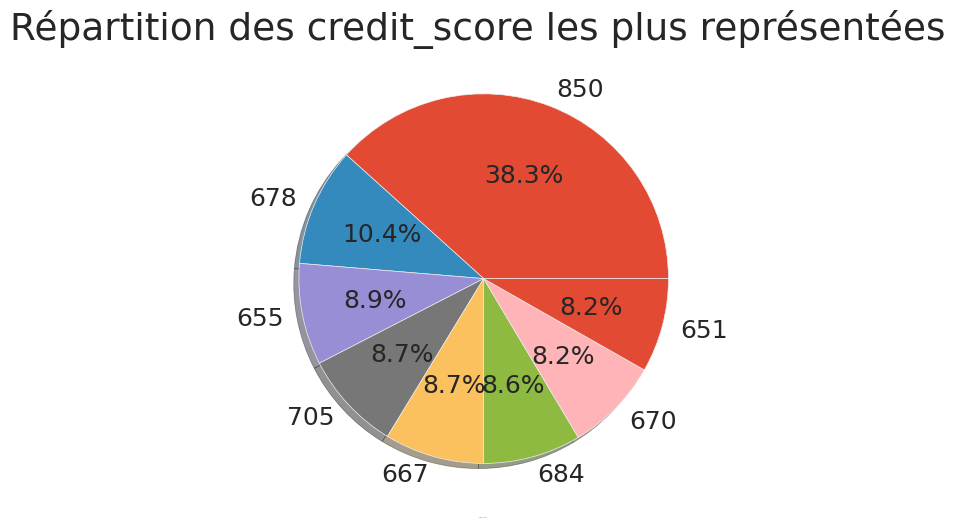

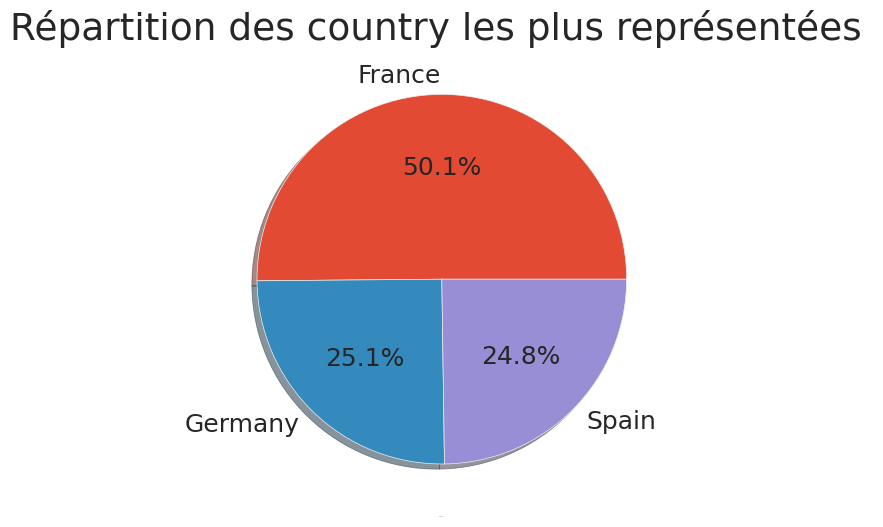

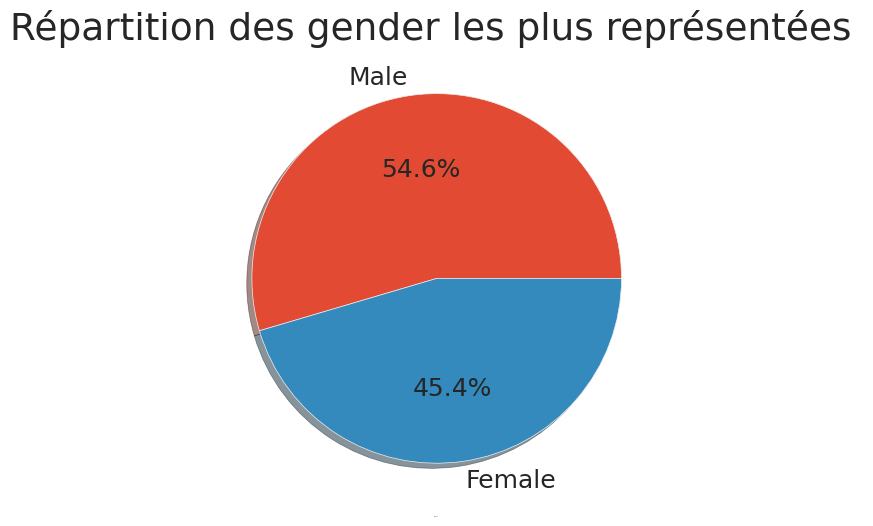

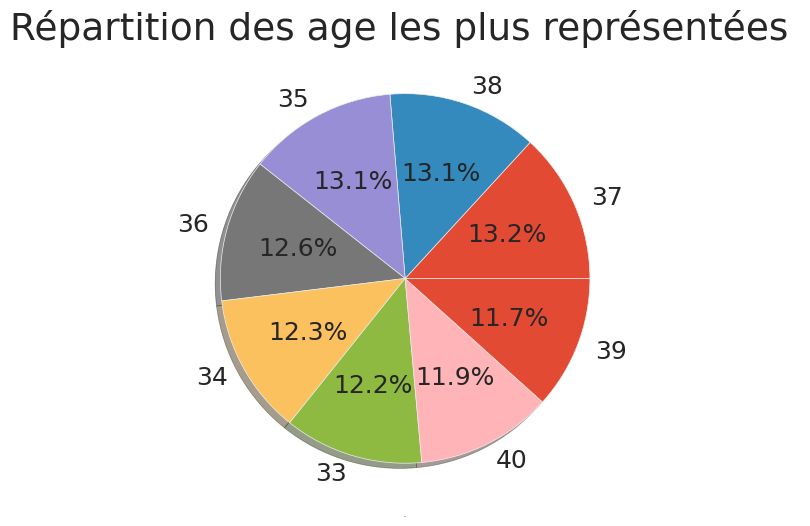

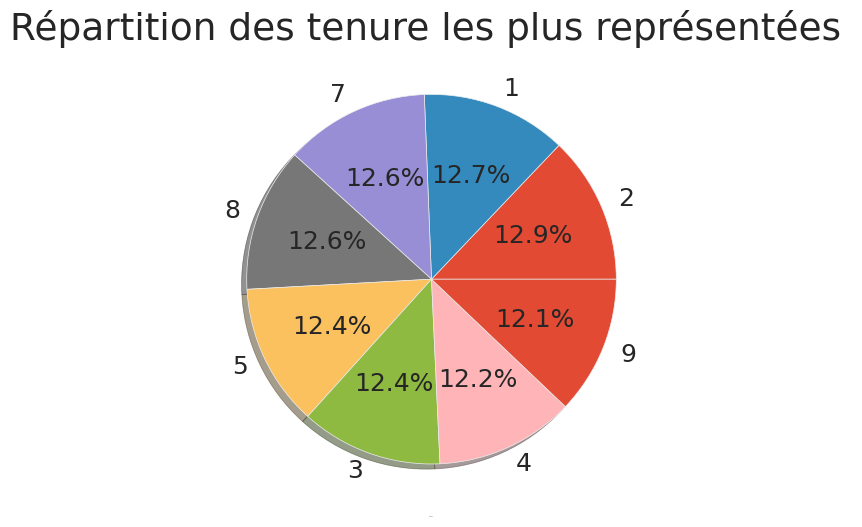

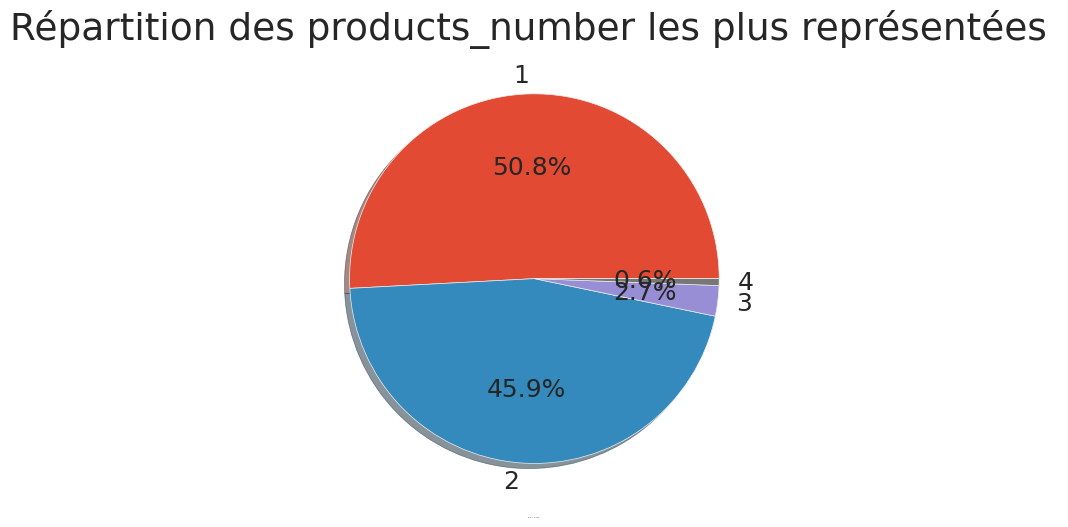

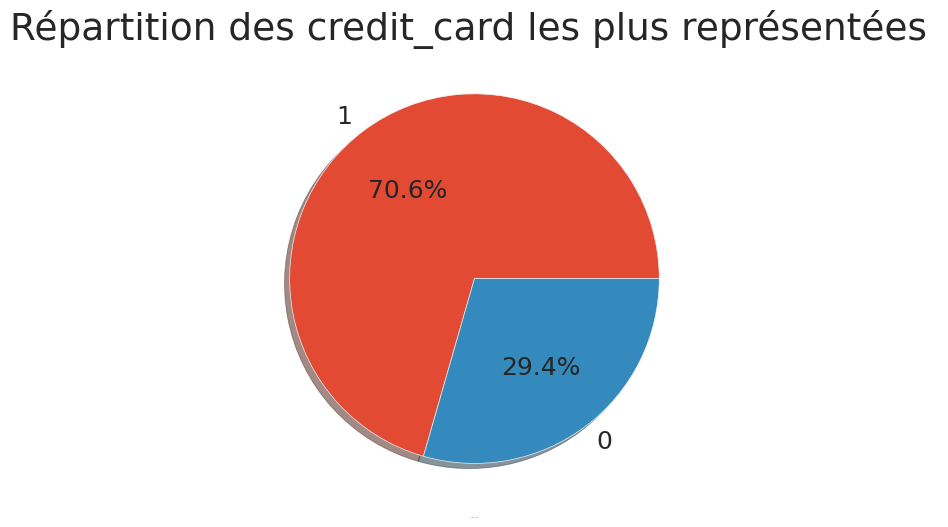

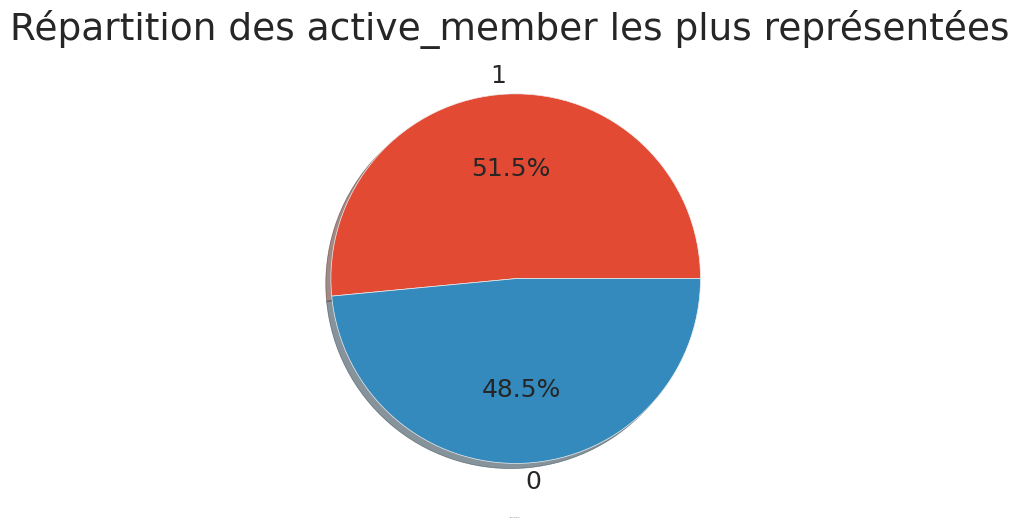

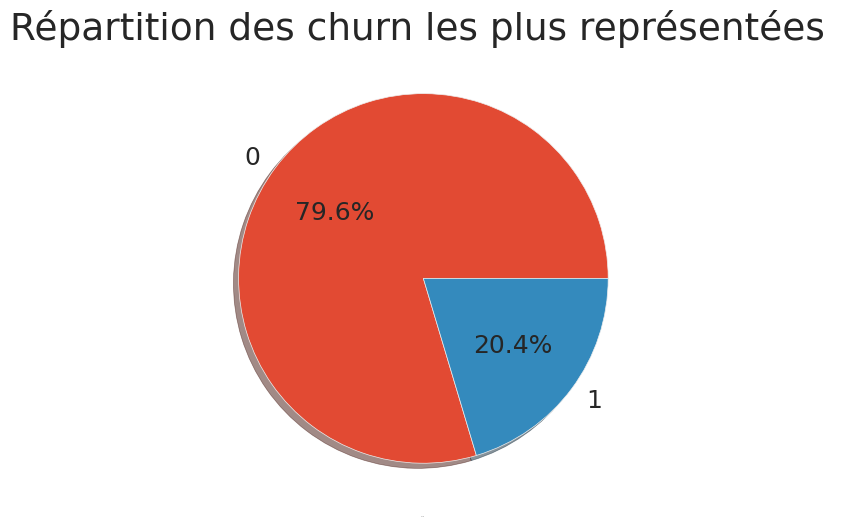

In [231]:
# afficher les variables objects avec plot cammenbert 
for col in li_object:
    
    df_churn[col].value_counts(normalize=True).head(8).plot(kind='pie', figsize=(12,6),subplots=True, shadow = True,autopct='%1.1f%%',
                                    textprops={'fontsize': 18} )
    plt.title(f'Répartition des {col} les plus représentées ', size=27)
    plt.ylabel('', fontsize=17)
    plt.xlabel(f'{col}', fontsize=0)
    plt.xticks(fontsize=22)
    
    plt.show()

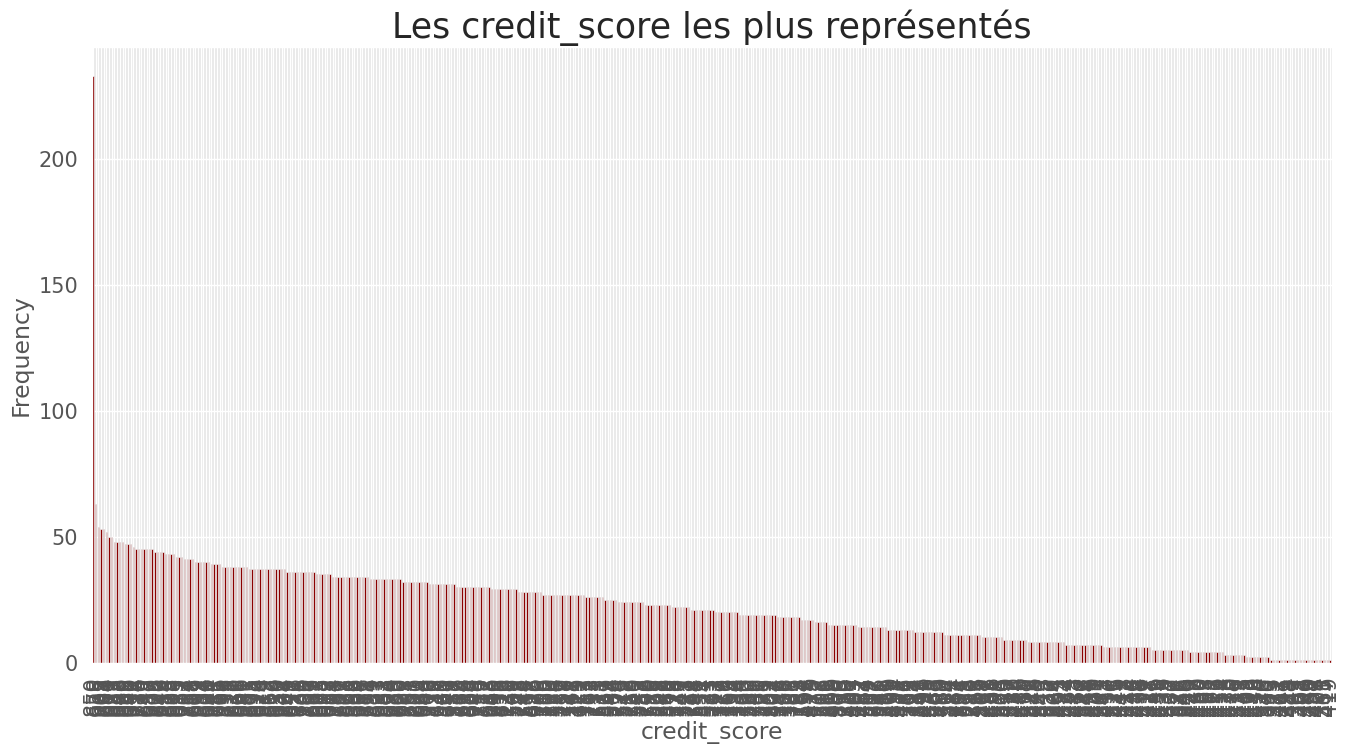

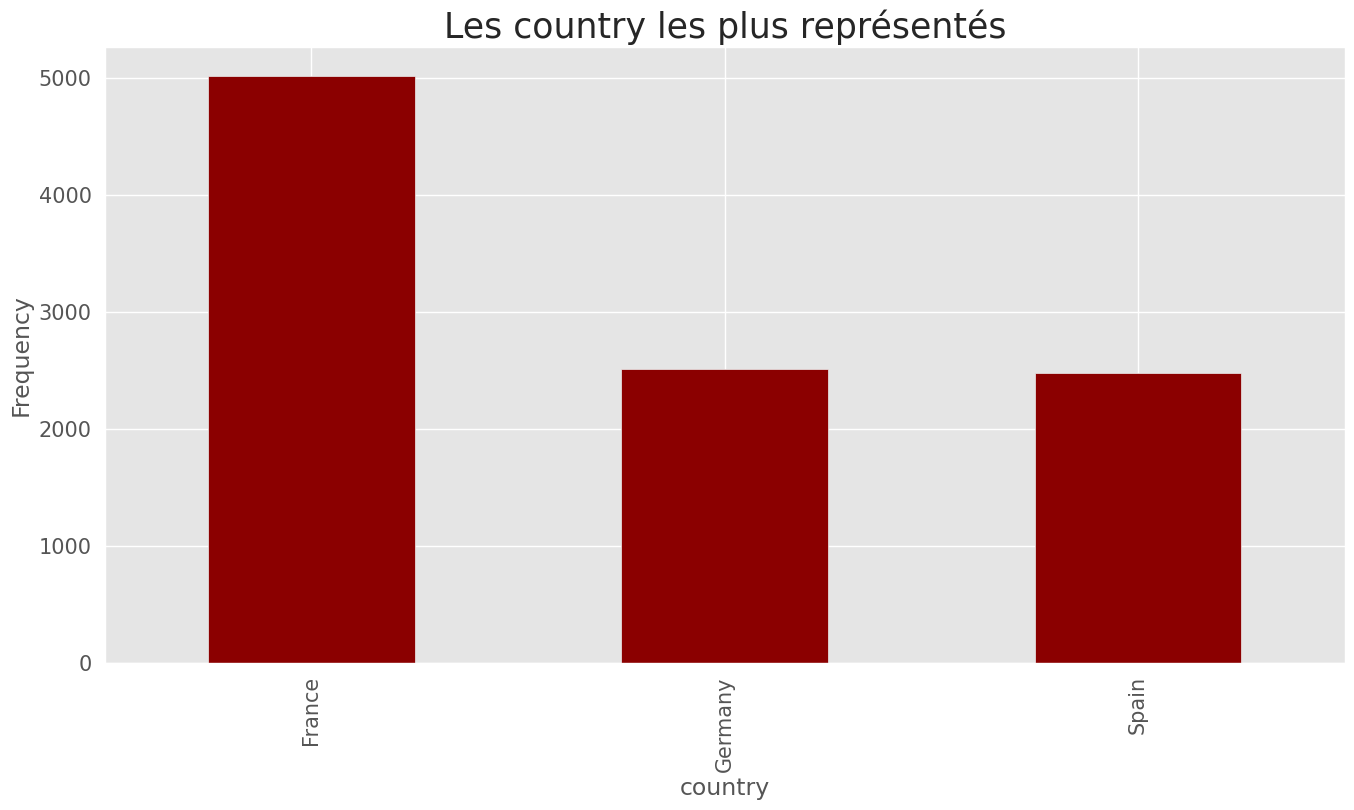

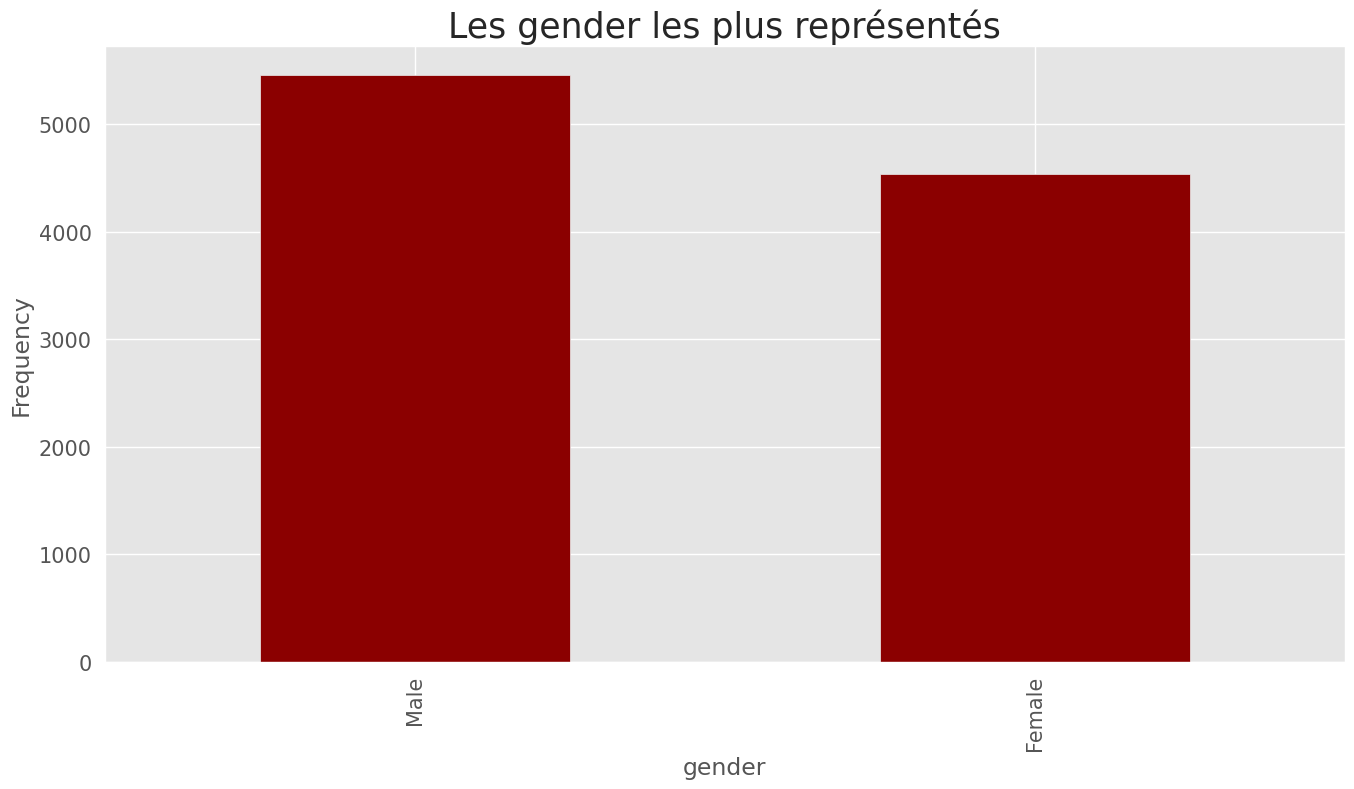

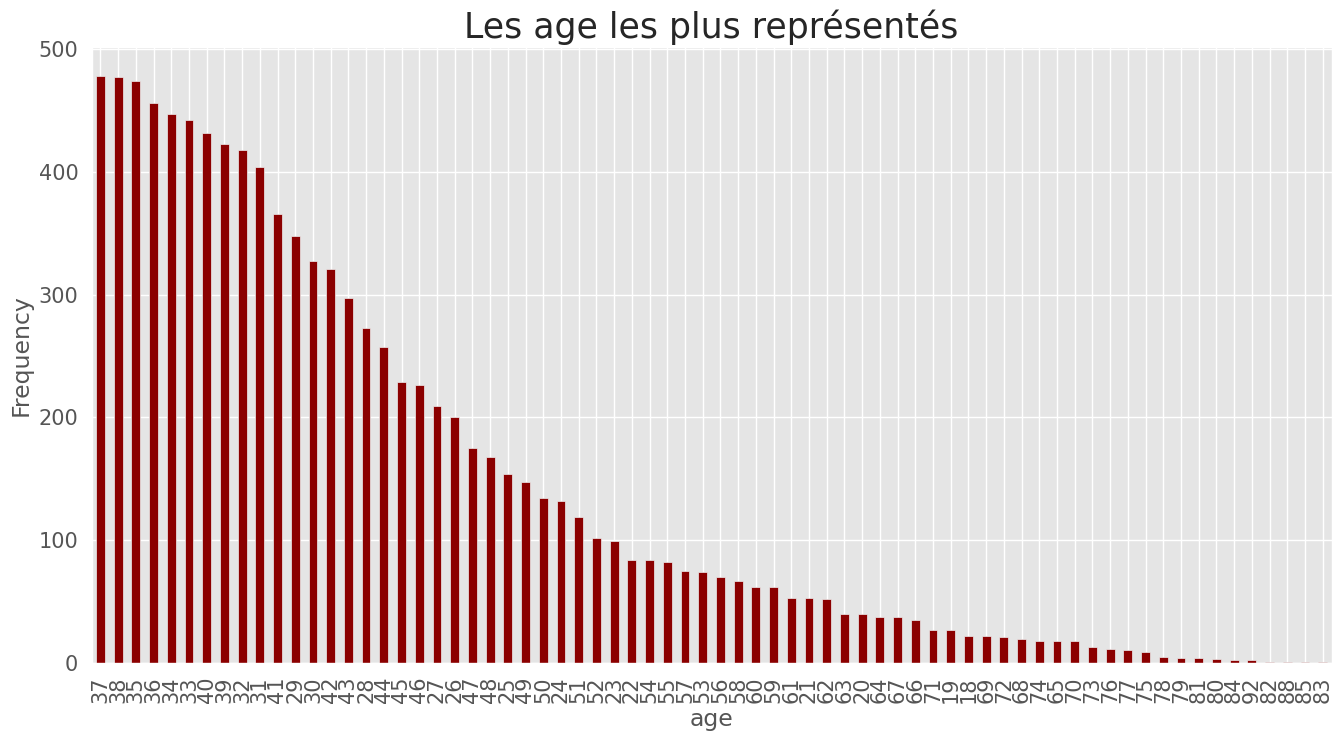

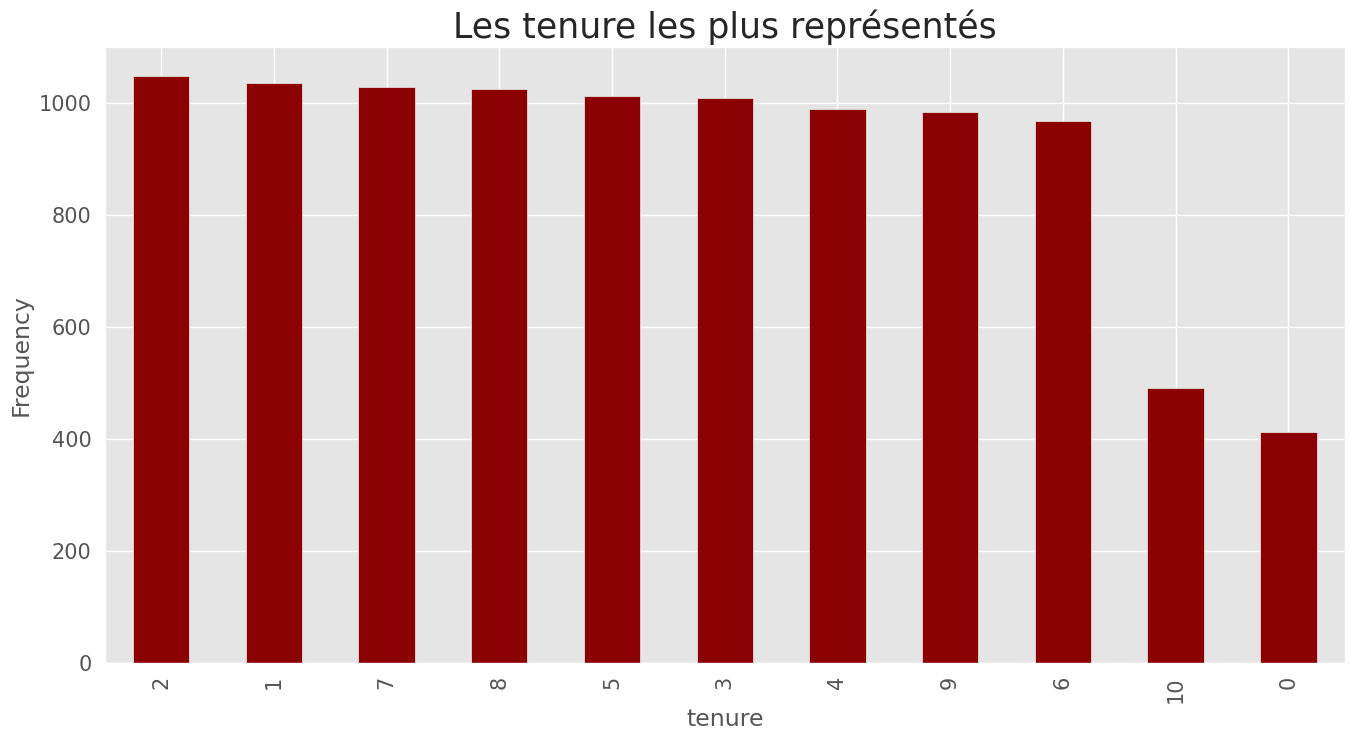

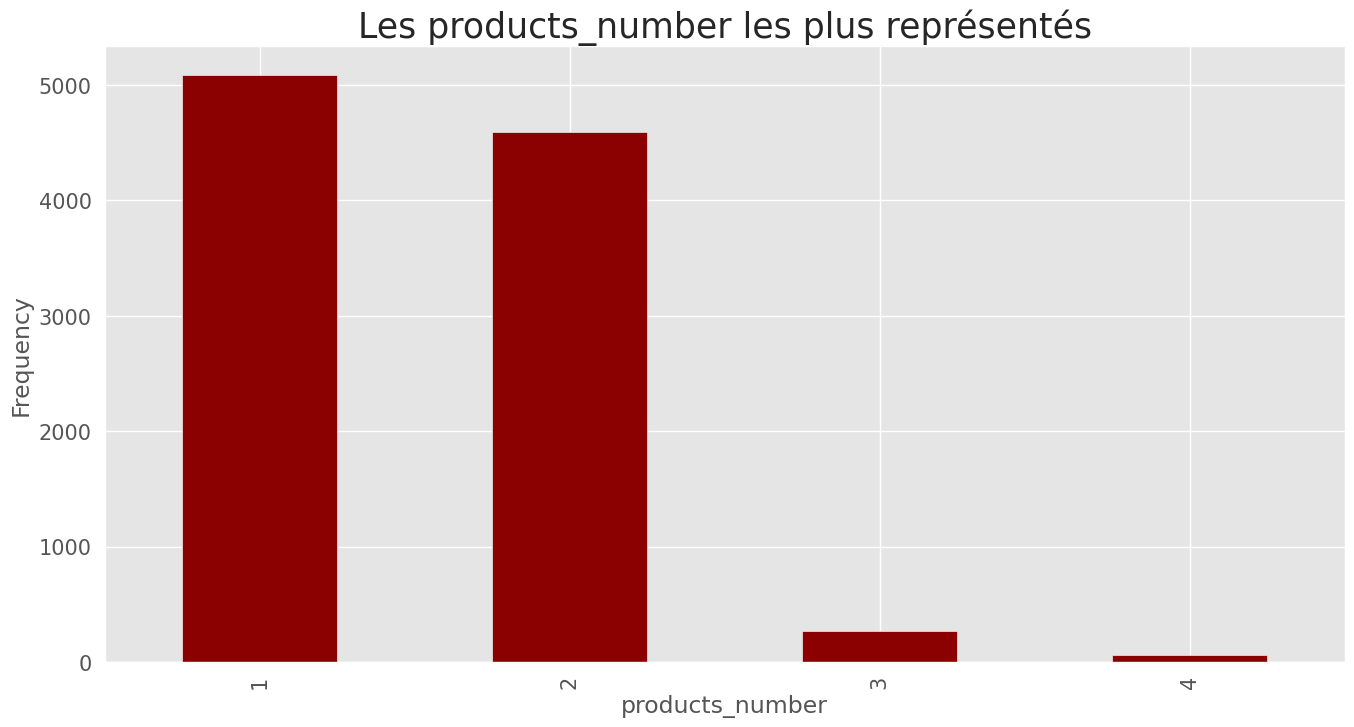

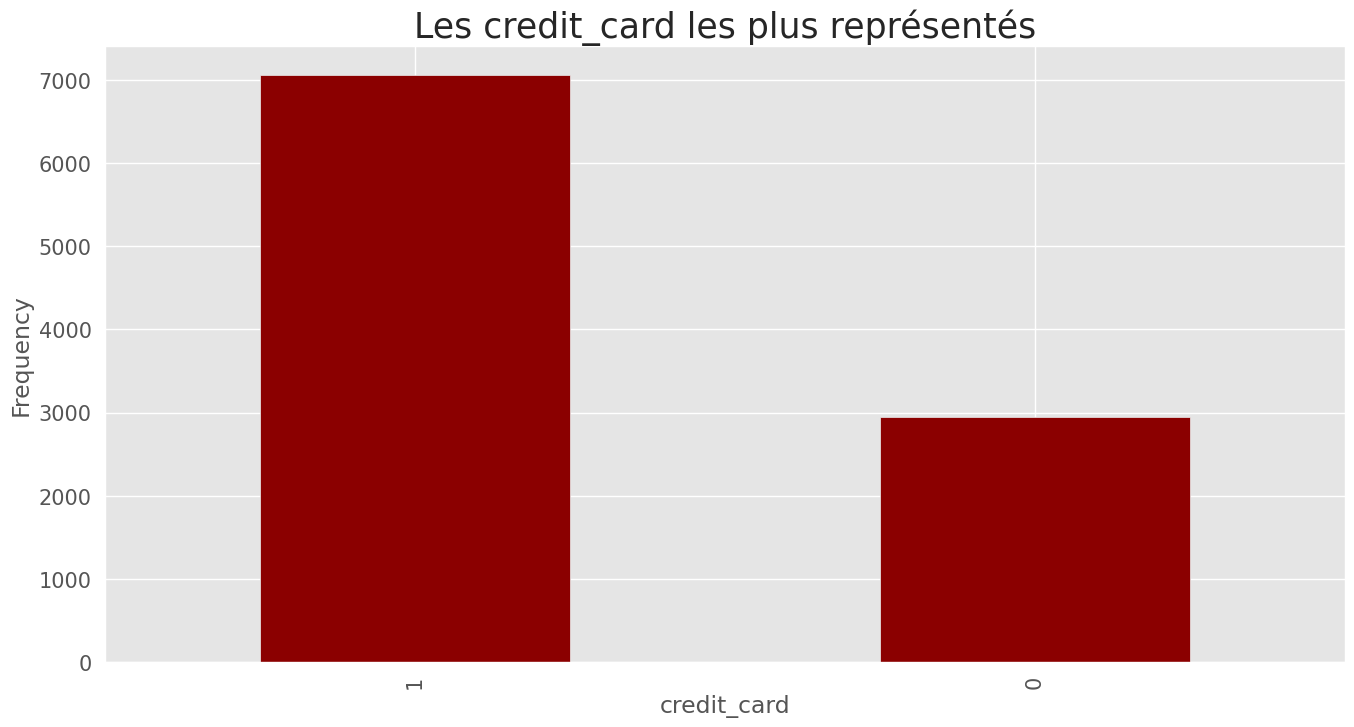

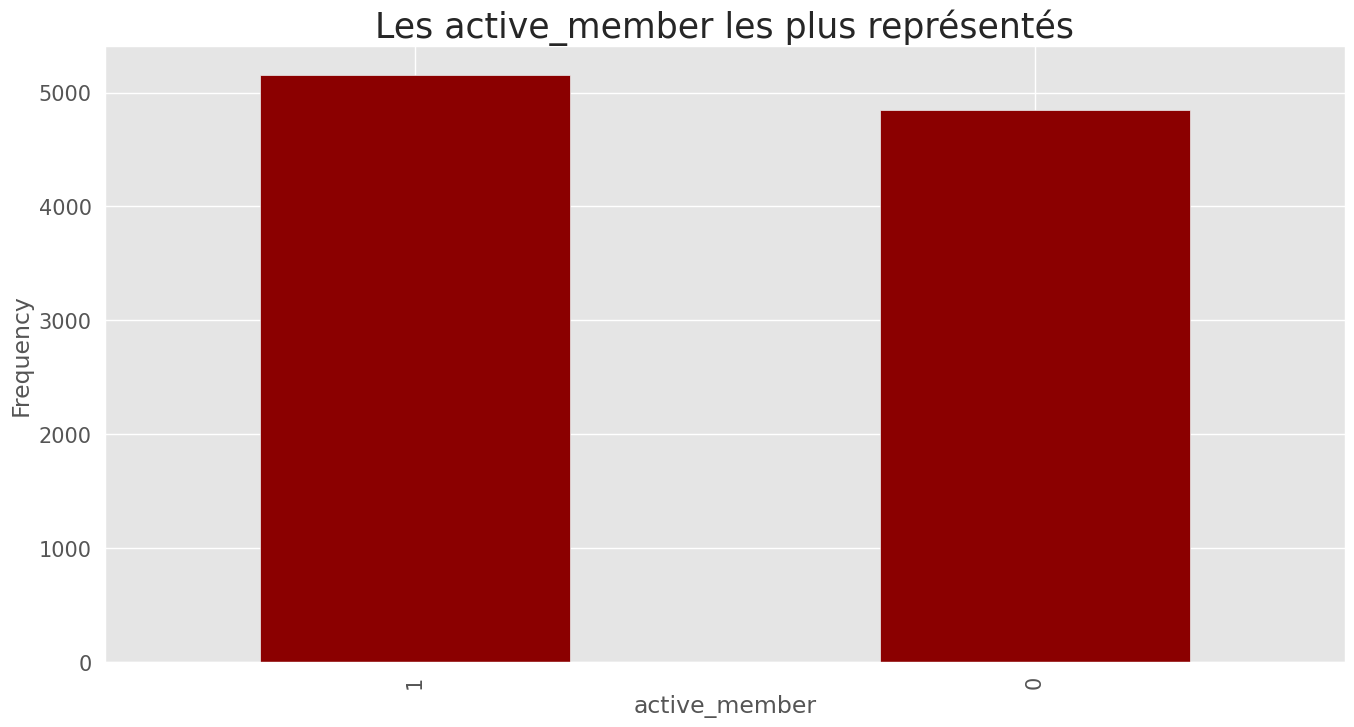

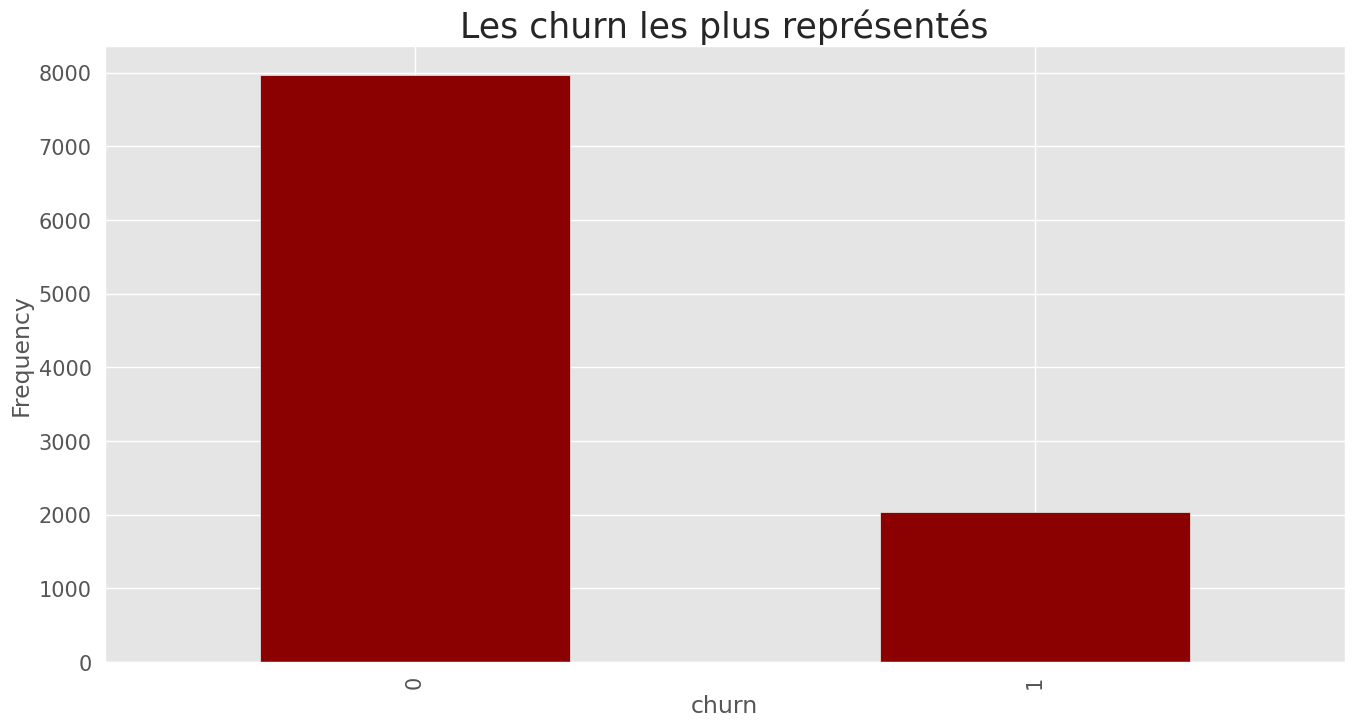

In [232]:
# afficher barplot des variables object
for col in li_object:
    df_churn[col].value_counts().plot( kind='bar', figsize=(16,8), color='darkred')
    plt.title(f'Les {col} les plus représentés', size=25)
    plt.ylabel('Frequency', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(f'{col}', fontsize=17)
    plt.show()
    print('')
    print('')
     

# Analyse bivariée